In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read doc in https://www.pymc.io/projects/docs/en/v3/index.html for pync3 installing
import pymc3 as pm
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Для сравнения возмем пример линейной регрессии
$$y=Ax+b+e$$
Где $x$ - одномерный вектор, $b$ - константа, $e$ - шум.

Coefficients A: 9.92, Intercept b: 3.7


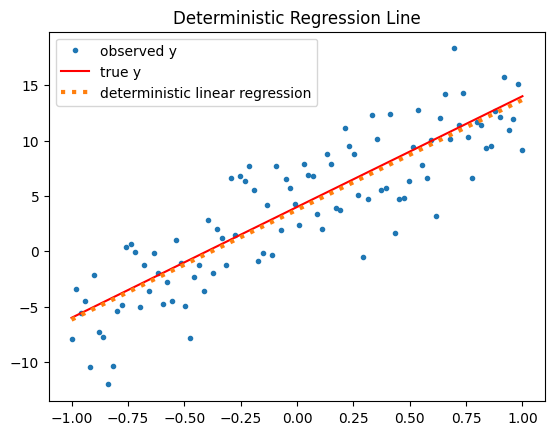

In [13]:
# LinearRegression
a = 10
b = 4
n = 100
sigma = 3
e = sigma * np.random.randn(n) 
x = np.linspace(-1, 1, num=n)
y = a * x + b + e

reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y);
print(f'Coefficients A: {reg.coef_[0]:.3}, Intercept b: {reg.intercept_:.2}')

plt.plot(x, y, '.', label='observed y');
plt.plot(x, a * x + b, 'r', label='true y');
plt.plot(x, reg.coef_[0] * x + reg.intercept_ , label='deterministic linear regression', ls='dotted',c='C1', lw=3)
plt.legend();
plt.title('Deterministic Regression Line');
plt.savefig('linear.jpg')

В Байесовском подходе это соотношение можно представить в виде: 
$$y \sim (Ax+b, \sigma^2)$$

В этом случае мы рассматриваем $y$ как случайную величину, подчиняющуюся нормальному распределению, определяемому средним $Ax+b$ и дисперсией $\sigma^2$.

In [20]:
model = pm.Model()
with model:
    a_0 = pm.Normal('a_0', mu=1, sigma=10)
    b_0 = pm.Normal('b_0', mu=1, sigma=10)
    x_0 = pm.Normal('x_0', mu=0, sigma=1, observed=x)
    mu_0 = a_0 * x_0 + b_0 
    sigma_0 = pm.HalfCauchy('sigma_0', beta=10)

    y_0 = pm.Normal('y_0', mu=mu_0, sigma=sigma_0, observed=y)

    trace = pm.sample(100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_0, b_0, a_0]


/Users/stureiko/Library/Application Support/pypoetry/venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/stureiko/Library/Application Support/pypoetry/venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/stureiko/Library/Application Support/pypoetry/venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/stureiko/Library/Application Support/pypoetry/venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 9 seconds.


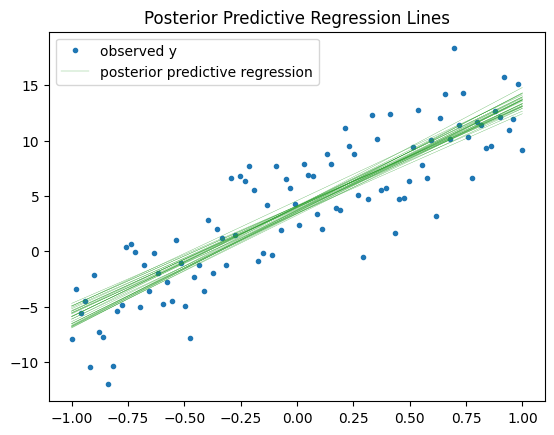

In [21]:
plt.plot(x, y, '.', label='observed y', c='C0')
# plt.plot(x, a * x + b, label='true y', lw=3., c='C3')
pm.plot_posterior_predictive_glm(trace, samples=30, 
                                 eval=x,
                                 lm=lambda x, sample: sample['b_0'] + sample['a_0'] * x, 
                                 label='posterior predictive regression', c='C2')
# plt.plot(x, reg.coef_[0] * x + reg.intercept_ , label='deterministic linear regression', ls='dotted',c='C1', lw=3)
plt.legend(loc=0);
plt.title('Posterior Predictive Regression Lines');
plt.savefig('bayes.png')